### Exploring Evictions in San Francisco ###

In [1]:
###Load in the necessary packages###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
bad_reasons = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sample = bad_reasons.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sample.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
135242,M131138,400 Block Of Eddy Street,06/17/2013,False,True,False,False,False,False,False,False,Tenderloin
95655,M210648,2700 Block Of 43rd Avenue,05/11/2021,True,False,False,False,False,False,False,False,Sunset/Parkside
116564,M041517,1100 Block Of Jackson Street,08/19/2004,False,False,False,False,False,False,False,False,Nob Hill
32131,M041335,0 Block Of Woodward Street,07/20/2004,False,False,False,False,False,True,False,False,Mission
10727,M150656,300 Block Of 10th Street,03/30/2015,False,True,False,False,False,False,False,False,South of Market
16873,M141519,1100 Block Of Mission Street,07/07/2014,False,False,False,False,False,False,False,False,South of Market
11439,M220798,1100 Block Of Sutter Street,05/18/2022,True,False,False,False,False,False,False,False,Nob Hill
43260,E982641,1500 Block Of 12th Avenue,11/13/1998,False,False,False,False,False,False,False,False,Inner Sunset
154746,M031272,1200 Block Of Stanyan Street,05/05/2003,False,False,False,False,False,False,False,False,Haight Ashbury
129873,E991536,200 Block Of Willard North Street,08/09/1999,False,False,False,False,False,True,False,False,Lone Mountain/USF


In [3]:
###find frequency of neighborhoods###

neighborhood_counts = sample[['Neighborhoods']].value_counts().reset_index(name='counts')
neighborhood_counts

,Neighborhoods,counts
0,Mission,552
1,Tenderloin,362
2,Sunset/Parkside,287
3,Lakeshore,252
4,Outer Richmond,225
5,Castro/Upper Market,221
6,South of Market,205
7,Hayes Valley,184
8,Haight Ashbury,169
9,Nob Hill,166


In [4]:
neighborhood_counts.describe()

,counts
count,41.000000
mean,121.951220
std,108.981868
min,1.000000
25%,56.000000
50%,113.000000
75%,154.000000
max,552.000000


<BarContainer object of 41 artists>

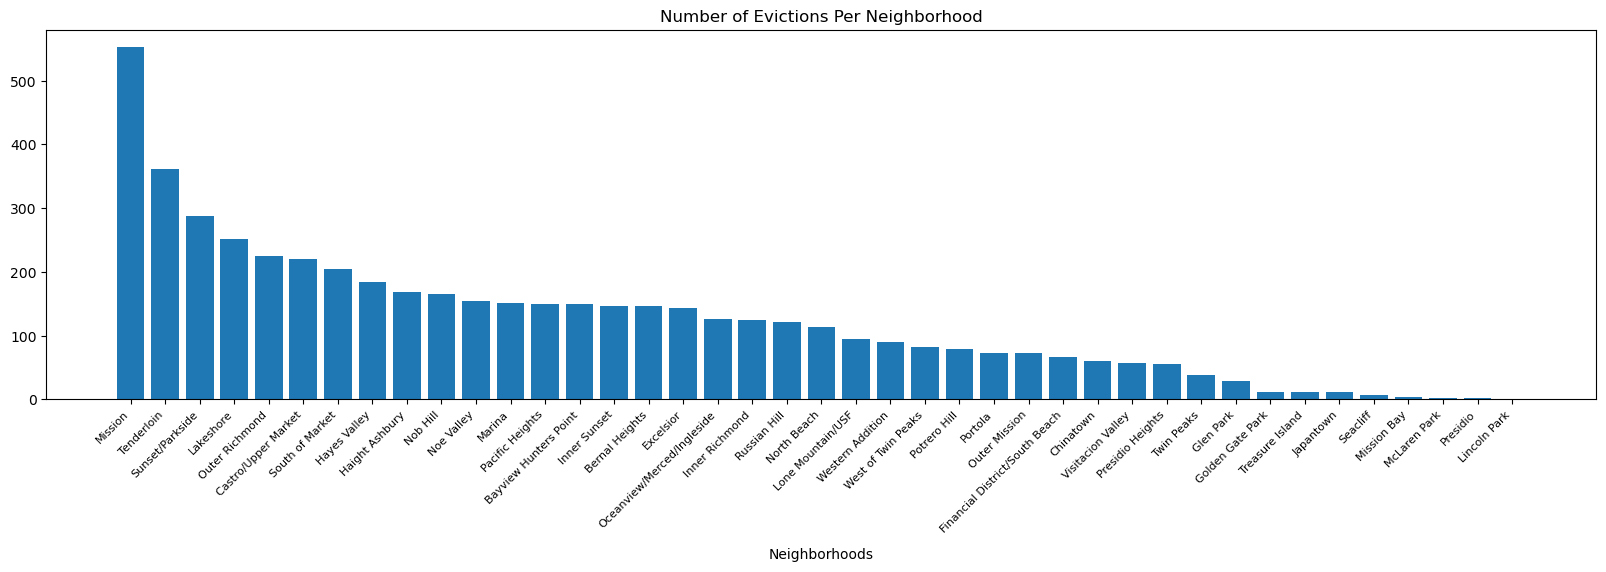

In [5]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
fig, ax = plt.subplots()
fig.set_figwidth(20)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.xlabel("Neighborhoods", labelpad = 10)
plt.title("Number of Evictions Per Neighborhood")
plt.bar(neighs, counts)

In [6]:
###load dataframe with only the reasons###
reasons = sample.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
135242,False,True,False,False,False,False,False,False
95655,True,False,False,False,False,False,False,False
116564,False,False,False,False,False,False,False,False
32131,False,False,False,False,False,True,False,False
10727,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7765,False,False,False,False,False,False,False,False
7049,False,True,False,False,False,False,False,False
125402,False,False,False,False,False,False,False,False
10484,False,True,False,False,False,False,False,False


In [7]:
###finding number of occurrences per reasons###
for col in reasons.columns:
    print(sample[[col]].value_counts().reset_index(name='counts'))

   Non Payment  counts
0        False    4653
1         True     347
   Nuisance  counts
0     False    4062
1      True     938
   Illegal Use  counts
0        False    4896
1         True     104
   Unapproved Subtenant  counts
0                 False    4931
1                  True      69
   Demolition  counts
0       False    4834
1        True     166
   Ellis Act WithDrawal  counts
0                 False    4545
1                  True     455
   Late Payments  counts
0          False    4816
1           True     184
   Failure to Sign Renewal  counts
0                    False    4987
1                     True      13


In [8]:
###another method to find number of true and false occurrences per reason###
columnNames = reasons.columns
trues_oc = {}

for i in reasons.columns:
    trues_oc[i] = reasons[i].sum()

print(trues_oc)

argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
print(argh)

{'Non Payment': 347, 'Nuisance': 938, 'Illegal Use': 104, 'Unapproved Subtenant': 69, 'Demolition': 166, 'Ellis Act WithDrawal': 455, 'Late Payments': 184, 'Failure to Sign Renewal': 13}
  index  Non Payment  Nuisance  Illegal Use  Unapproved Subtenant  Demolition  \
0  True          347       938          104                    69         166   

   Ellis Act WithDrawal  Late Payments  Failure to Sign Renewal  
0                   455            184                       13  


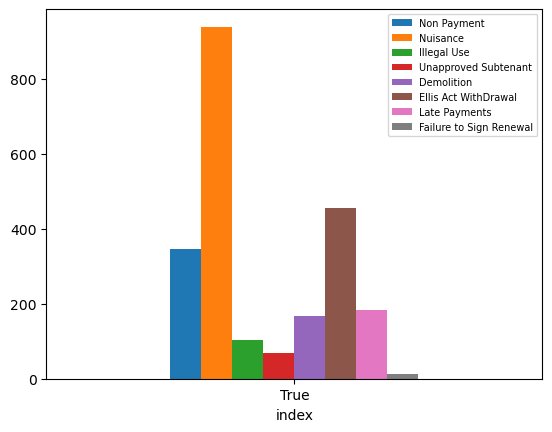

In [9]:
reasons_list = [column for column in argh.columns]
reasons_bar = argh.plot(x='index', y=reasons_list[1:], kind='bar', rot=0)
plt.legend(loc='best', fontsize='7')